# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite
from pyBasket.common import DEFAULT_DECISION_THRESHOLD, DEFAULT_DECISION_THRESHOLD_INTERIM
from pyBasket.common import MODEL_INDEPENDENT, MODEL_INDEPENDENT_BERN, MODEL_BHM, MODEL_PYBASKET

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 4

## Example 1: treatment is of interest in all groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 1).

4 groups are present in the trial, and all group response rates to the treatment are the same (0.3). The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The first example is a scenario in which responses are simulated assuming p = 30% in all four groups. This example illustrates the effect of borrowing across groups when all groups are similar, such as the smoothing of the observed response rates and a reduction in uncertainty.

### Generate data

In [8]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p1, p1, p1, p1]
enrollments = [[10, 5, 5, 5, 5, 5] for _ in range(K)]
site = TrueResponseSite(true_response_rates, enrollments)

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = True

In [10]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-22 17:20:17.567 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-22 17:20:17.569 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 3/10 for Analysis independent
2023-06-22 17:20:17.570 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 3/10 for Analysis BHM
2023-06-22 17:20:17.570 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 2/10 for Analysis independent
2023-06-22 17:20:17.571 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 2/10 for Analysis BHM
2023-06-22 17:20:17.571 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 1/10 for Analysis independent
2023-06-22 17:20:17.571 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 1/10 for Analysis BHM
2023-06-22 17:20:17.571 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 4/10 for Analysis independent
2023-06-22 17:20:17.572 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 4/10 for 

### Check last results

### Simple

In [11]:
analysis_name = analysis_names[0]
analysis_name

'independent'

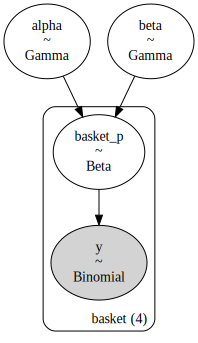

In [12]:
trial.visualise_model(analysis_name)

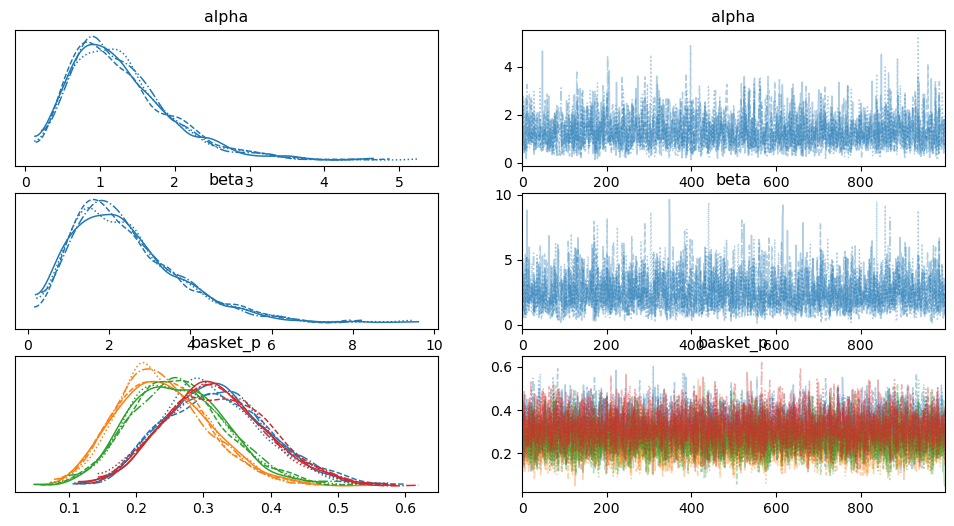

In [13]:
trial.plot_trace(analysis_name, -1)

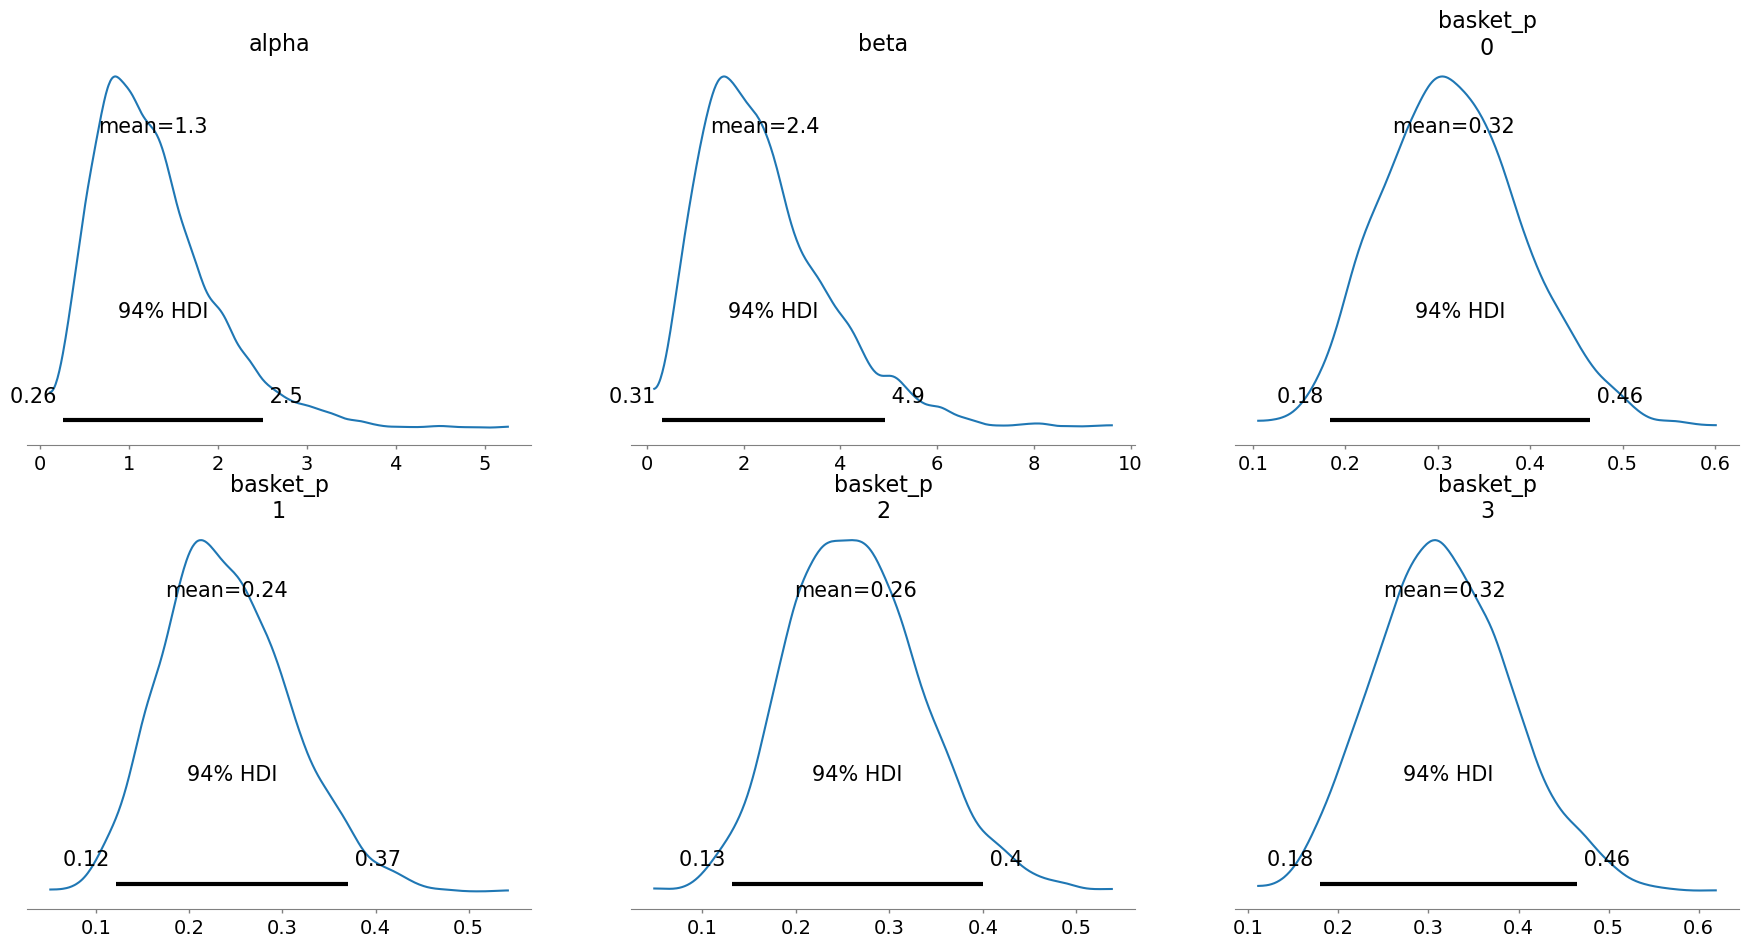

In [14]:
trial.plot_posterior(analysis_name, -1)

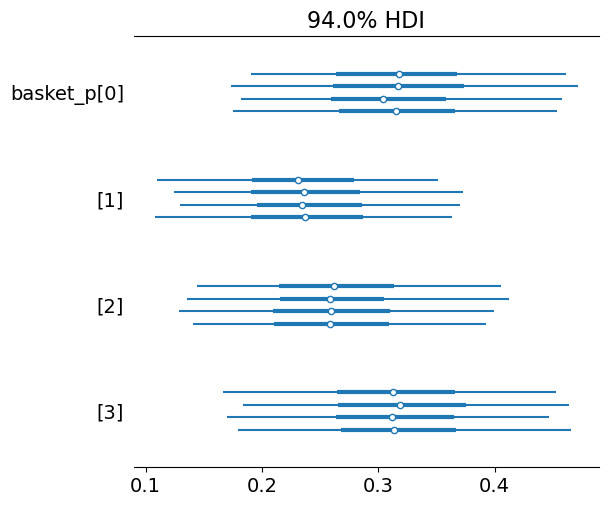

In [15]:
trial.plot_forest(analysis_name, -1)

In [16]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status
k,,,,
0,0.78325,0.05,True,OPEN
1,0.54675,0.05,True,OPEN
2,0.27775,0.05,True,OPEN
3,0.92225,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.54000,0.05,True,OPEN
1,0.54175,0.05,True,OPEN
2,0.32025,0.05,True,OPEN
3,0.98875,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.52875,0.05,True,OPEN
1,0.71725,0.05,True,OPEN
2,0.34325,0.05,True,OPEN
3,0.94350,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.85375,0.05,True,OPEN
1,0.72000,0.05,True,OPEN
2,0.72475,0.05,True,OPEN
3,0.93725,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.96000,0.05,True,OPEN
1,0.55425,0.05,True,OPEN
2,0.83650,0.05,True,OPEN
3,0.96025,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,1.0000,0.9,True,COMPLETED_EFFECTIVE
1,0.9950,0.9,True,COMPLETED_EFFECTIVE
2,0.9965,0.9,True,COMPLETED_EFFECTIVE
3,1.0000,0.9,True,COMPLETED_EFFECTIVE


In [17]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_EFFECTIVE,11,35
1,COMPLETED_EFFECTIVE,8,35
2,COMPLETED_EFFECTIVE,9,35
3,COMPLETED_EFFECTIVE,11,35


### BHM

In [18]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

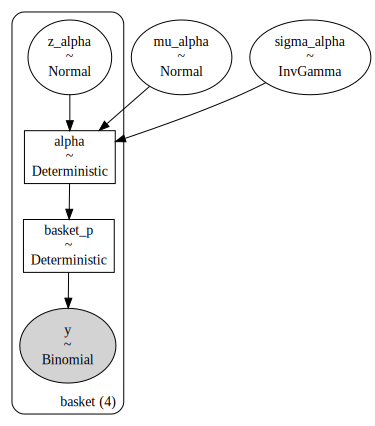

In [19]:
trial.visualise_model(analysis_name)

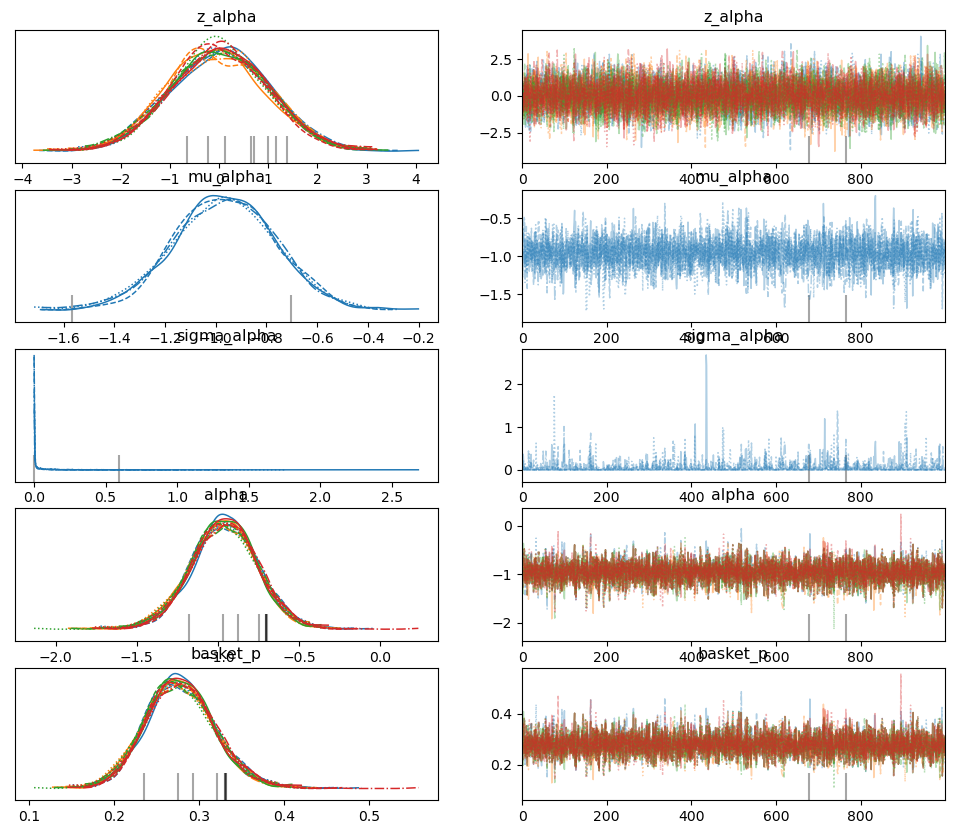

In [20]:
trial.plot_trace(analysis_name, -1)

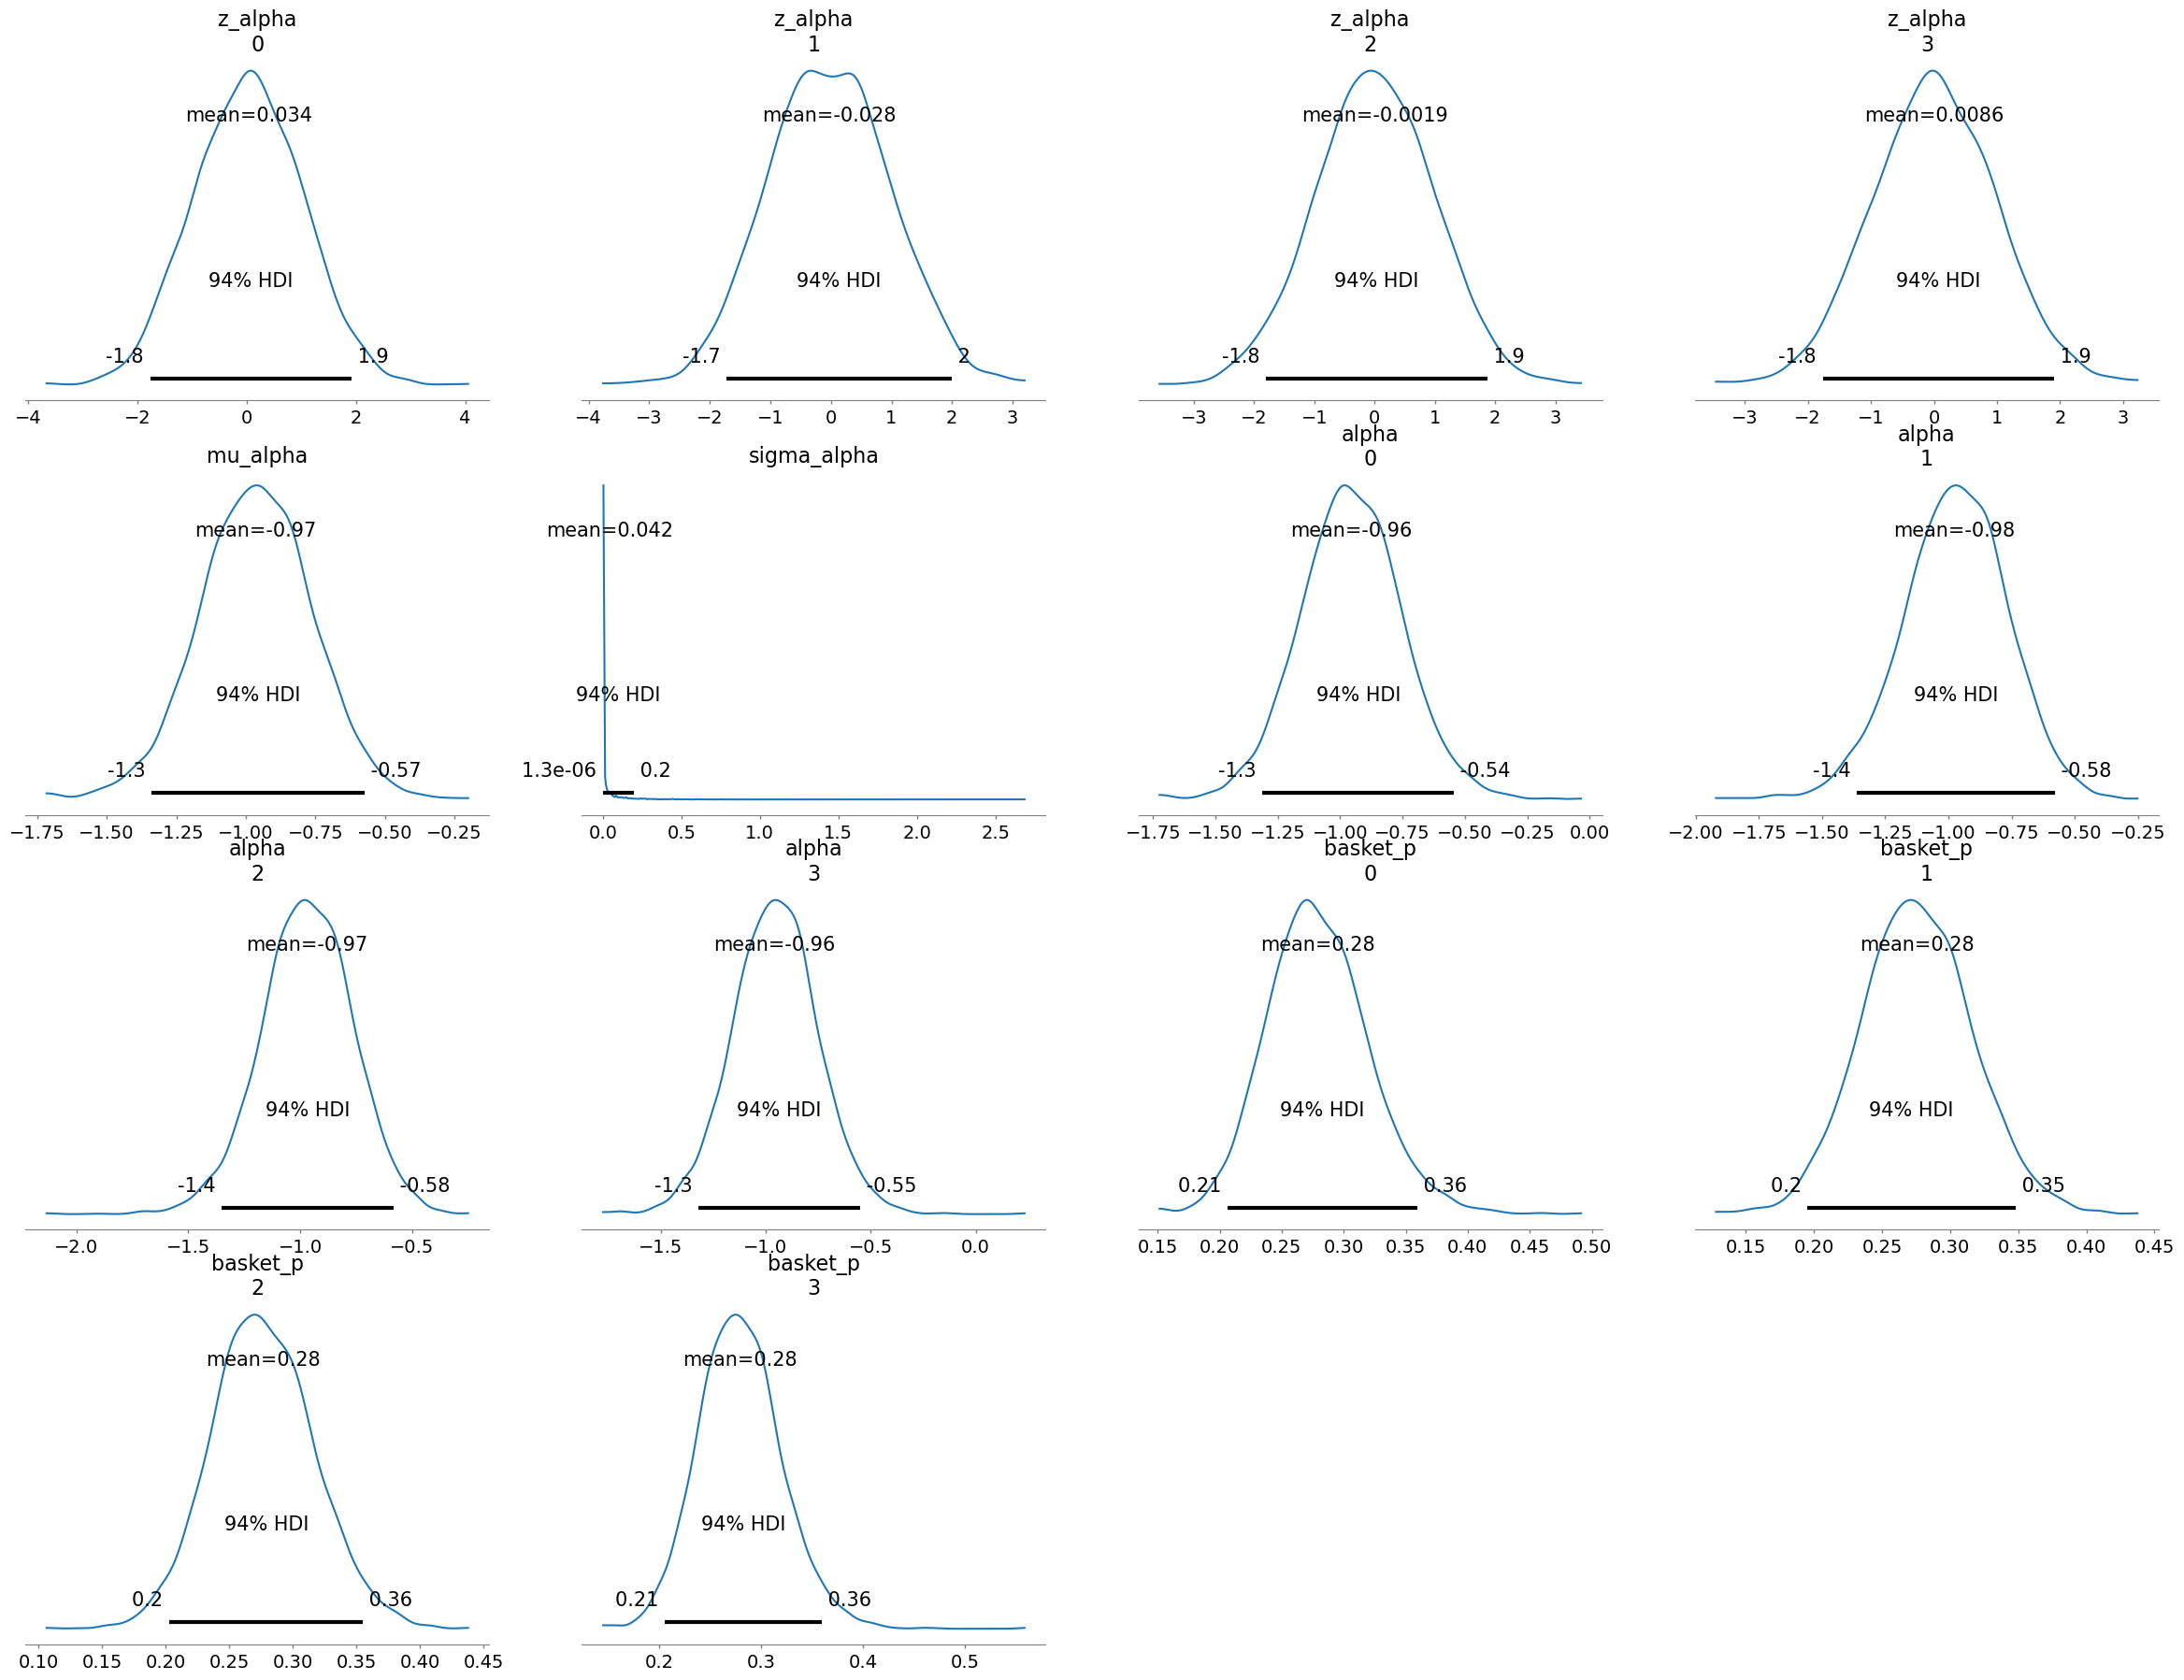

In [21]:
trial.plot_posterior(analysis_name, -1)

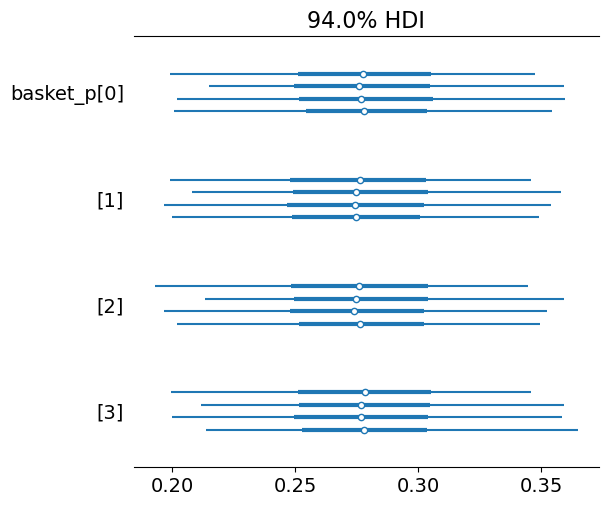

In [22]:
trial.plot_forest(analysis_name, -1)

In [23]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status
k,,,,
0,0.75925,0.05,True,OPEN
1,0.73825,0.05,True,OPEN
2,0.71400,0.05,True,OPEN
3,0.77525,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.75550,0.05,True,OPEN
1,0.75875,0.05,True,OPEN
2,0.72550,0.05,True,OPEN
3,0.83075,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.75700,0.05,True,OPEN
1,0.77400,0.05,True,OPEN
2,0.74050,0.05,True,OPEN
3,0.79375,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.94200,0.05,True,OPEN
1,0.93625,0.05,True,OPEN
2,0.93600,0.05,True,OPEN
3,0.94575,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.98400,0.05,True,OPEN
1,0.96125,0.05,True,OPEN
2,0.97350,0.05,True,OPEN
3,0.98200,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,1.0,0.9,True,COMPLETED_EFFECTIVE
1,1.0,0.9,True,COMPLETED_EFFECTIVE
2,1.0,0.9,True,COMPLETED_EFFECTIVE
3,1.0,0.9,True,COMPLETED_EFFECTIVE


In [24]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_EFFECTIVE,11,35
1,COMPLETED_EFFECTIVE,8,35
2,COMPLETED_EFFECTIVE,9,35
3,COMPLETED_EFFECTIVE,11,35


## Example 2: treatment is of interest in only two groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 2).

4 groups are present in the group, with first two group responses = 0.10 and the other two groups = 0.3. The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The second example is from a scenario in which responses are simulated assuming p = 10% in two groups and p = 30% in two groups. This example illustrates the effect of borrowing, and that the harm is not great, when groups are dissimilar.

### Generate data

In [25]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p0, p0, p1, p1]
enrollments = [[10, 5, 5, 5, 5, 5] for _ in range(K)]
site = TrueResponseSite(true_response_rates, enrollments)

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [26]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = False

In [27]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-22 17:26:55.515 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-22 17:26:55.516 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 0/10 for Analysis independent
2023-06-22 17:26:55.516 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 0/10 for Analysis BHM
2023-06-22 17:26:55.517 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 0/10 for Analysis independent
2023-06-22 17:26:55.517 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 0/10 for Analysis BHM
2023-06-22 17:26:55.518 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 3/10 for Analysis independent
2023-06-22 17:26:55.518 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 3/10 for Analysis BHM
2023-06-22 17:26:55.518 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/10 for Analysis independent
2023-06-22 17:26:55.519 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/10 for 

### Check last results

### Simple

In [28]:
analysis_name = analysis_names[0]
analysis_name

'independent'

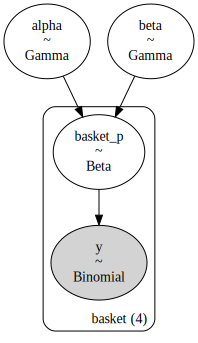

In [29]:
trial.visualise_model(analysis_name)

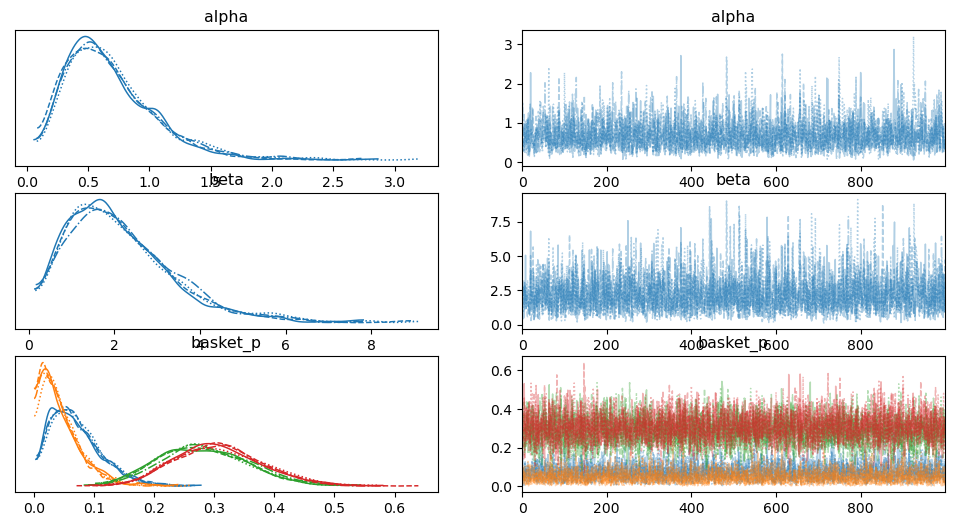

In [30]:
trial.plot_trace(analysis_name, -1)

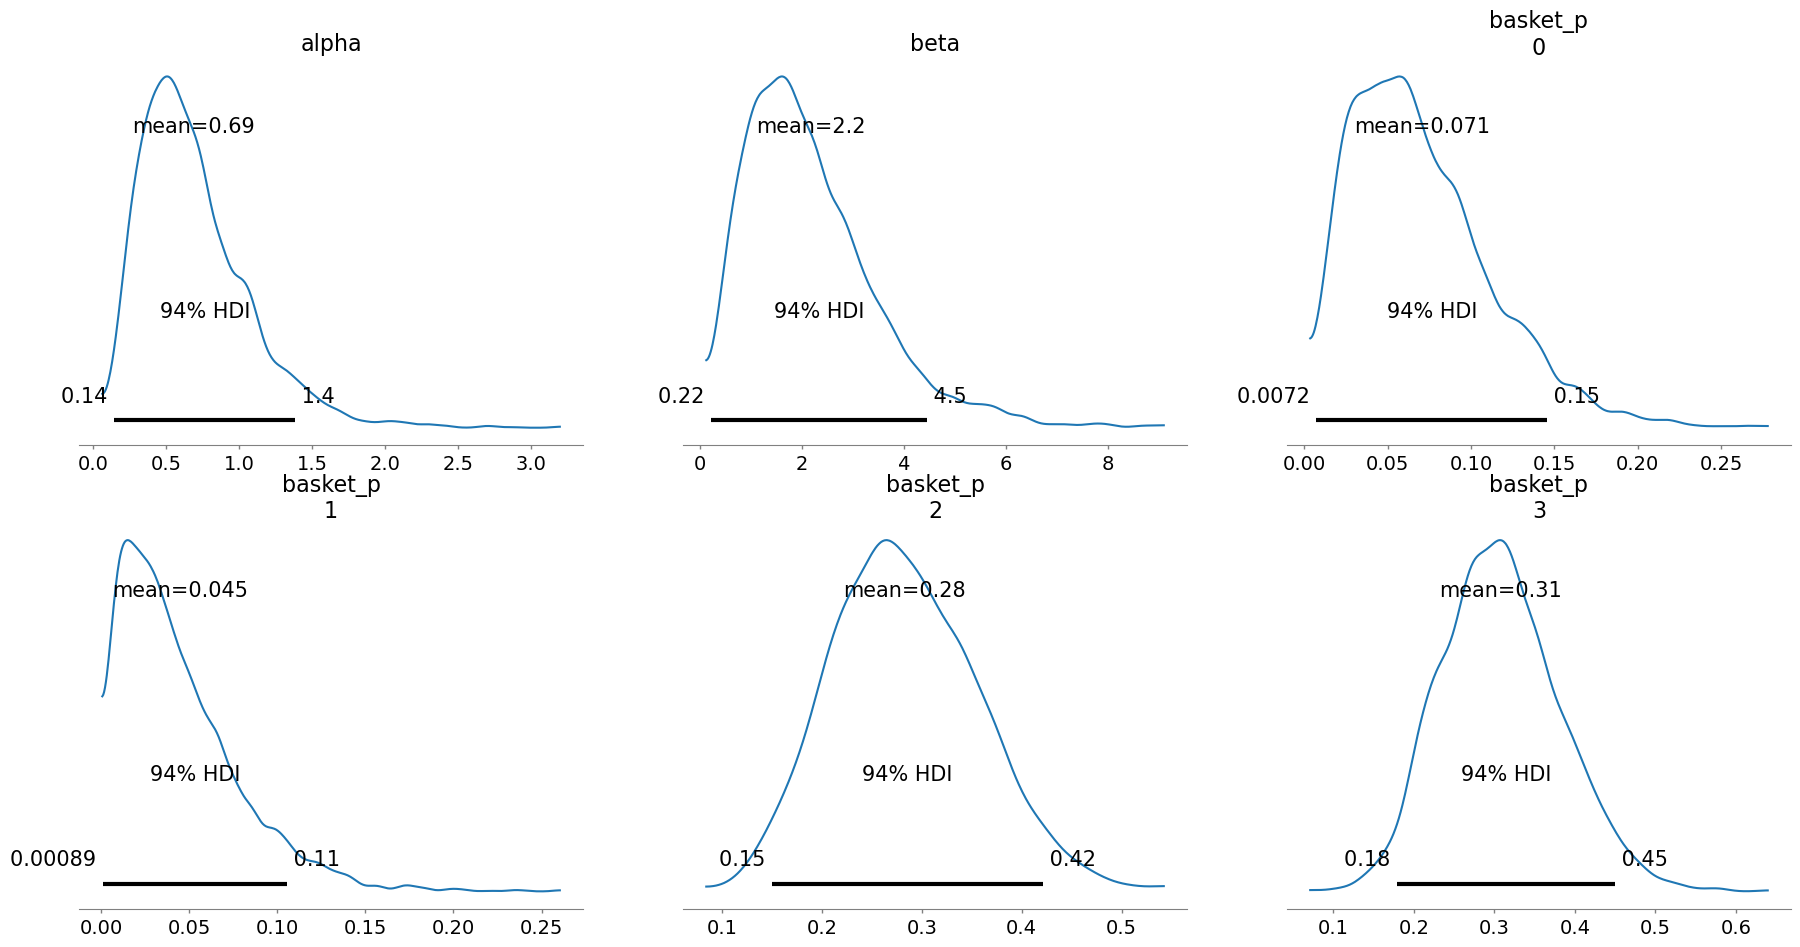

In [31]:
trial.plot_posterior(analysis_name, -1)

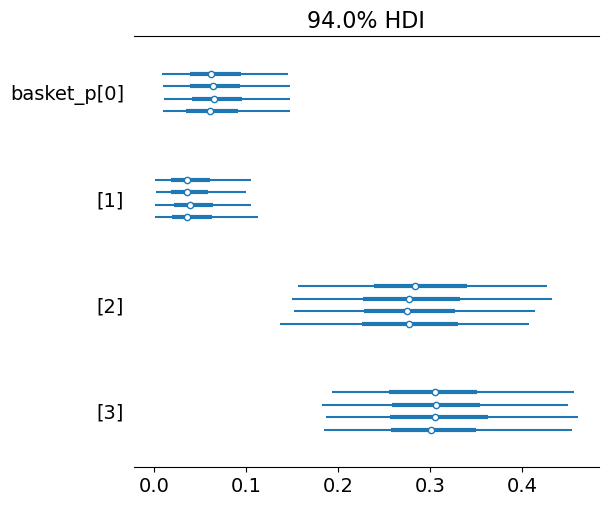

In [32]:
trial.plot_forest(analysis_name, -1)

In [33]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status
k,,,,
0,0.02725,0.05,False,OPEN
1,0.02250,0.05,False,OPEN
2,0.71400,0.05,True,OPEN
3,0.72525,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.00675,0.05,False,OPEN
1,0.00800,0.05,False,OPEN
2,0.85275,0.05,True,OPEN
3,0.86250,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.00150,0.05,False,OPEN
1,0.00175,0.05,False,OPEN
2,0.81000,0.05,True,OPEN
3,0.82475,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.00850,0.05,False,OPEN
1,0.00075,0.05,False,OPEN
2,0.65150,0.05,True,OPEN
3,0.90175,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.01925,0.05,False,OPEN
1,0.00025,0.05,False,OPEN
2,0.79625,0.05,True,OPEN
3,0.94925,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.21425,0.9,False,COMPLETED_INEFFECTIVE
1,0.07400,0.9,False,COMPLETED_INEFFECTIVE
2,0.99925,0.9,True,COMPLETED_EFFECTIVE
3,0.99950,0.9,True,COMPLETED_EFFECTIVE


In [34]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,35
1,COMPLETED_INEFFECTIVE,1,35
2,COMPLETED_EFFECTIVE,10,35
3,COMPLETED_EFFECTIVE,11,35


### BHM

In [35]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

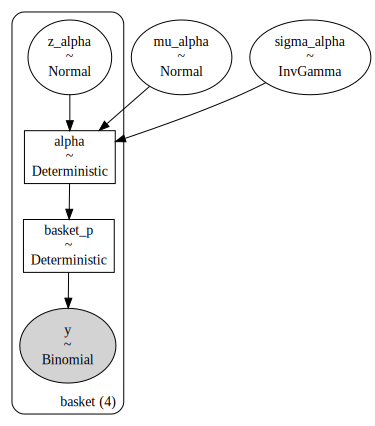

In [36]:
trial.visualise_model(analysis_name)

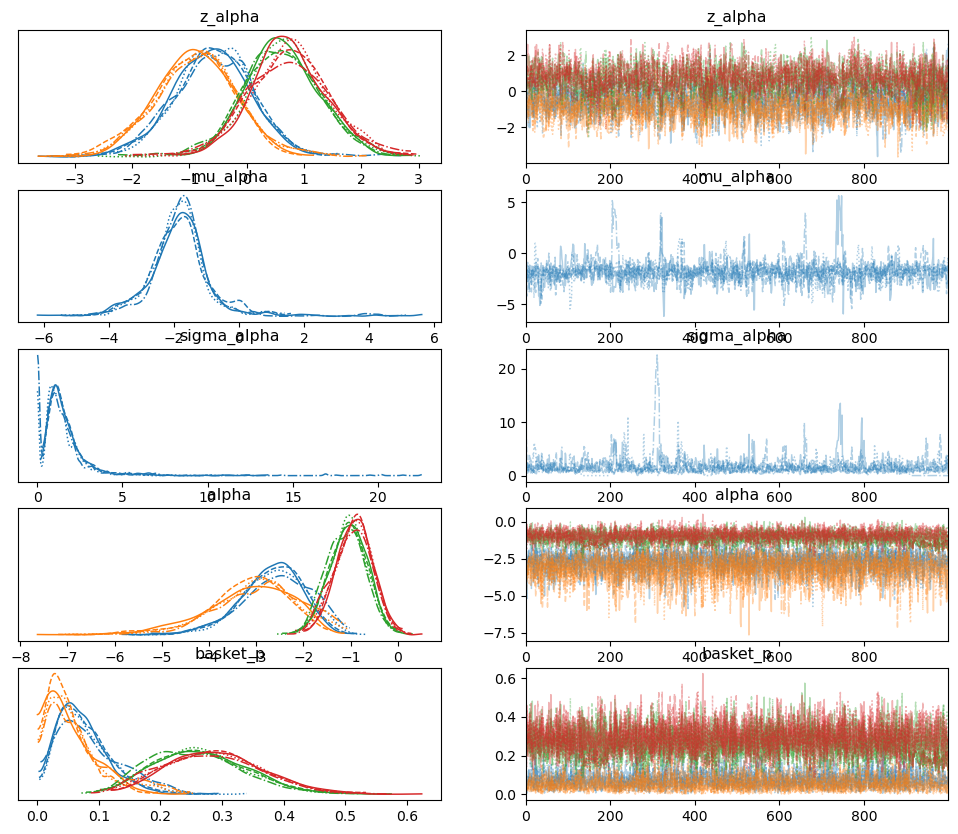

In [37]:
trial.plot_trace(analysis_name, -1)

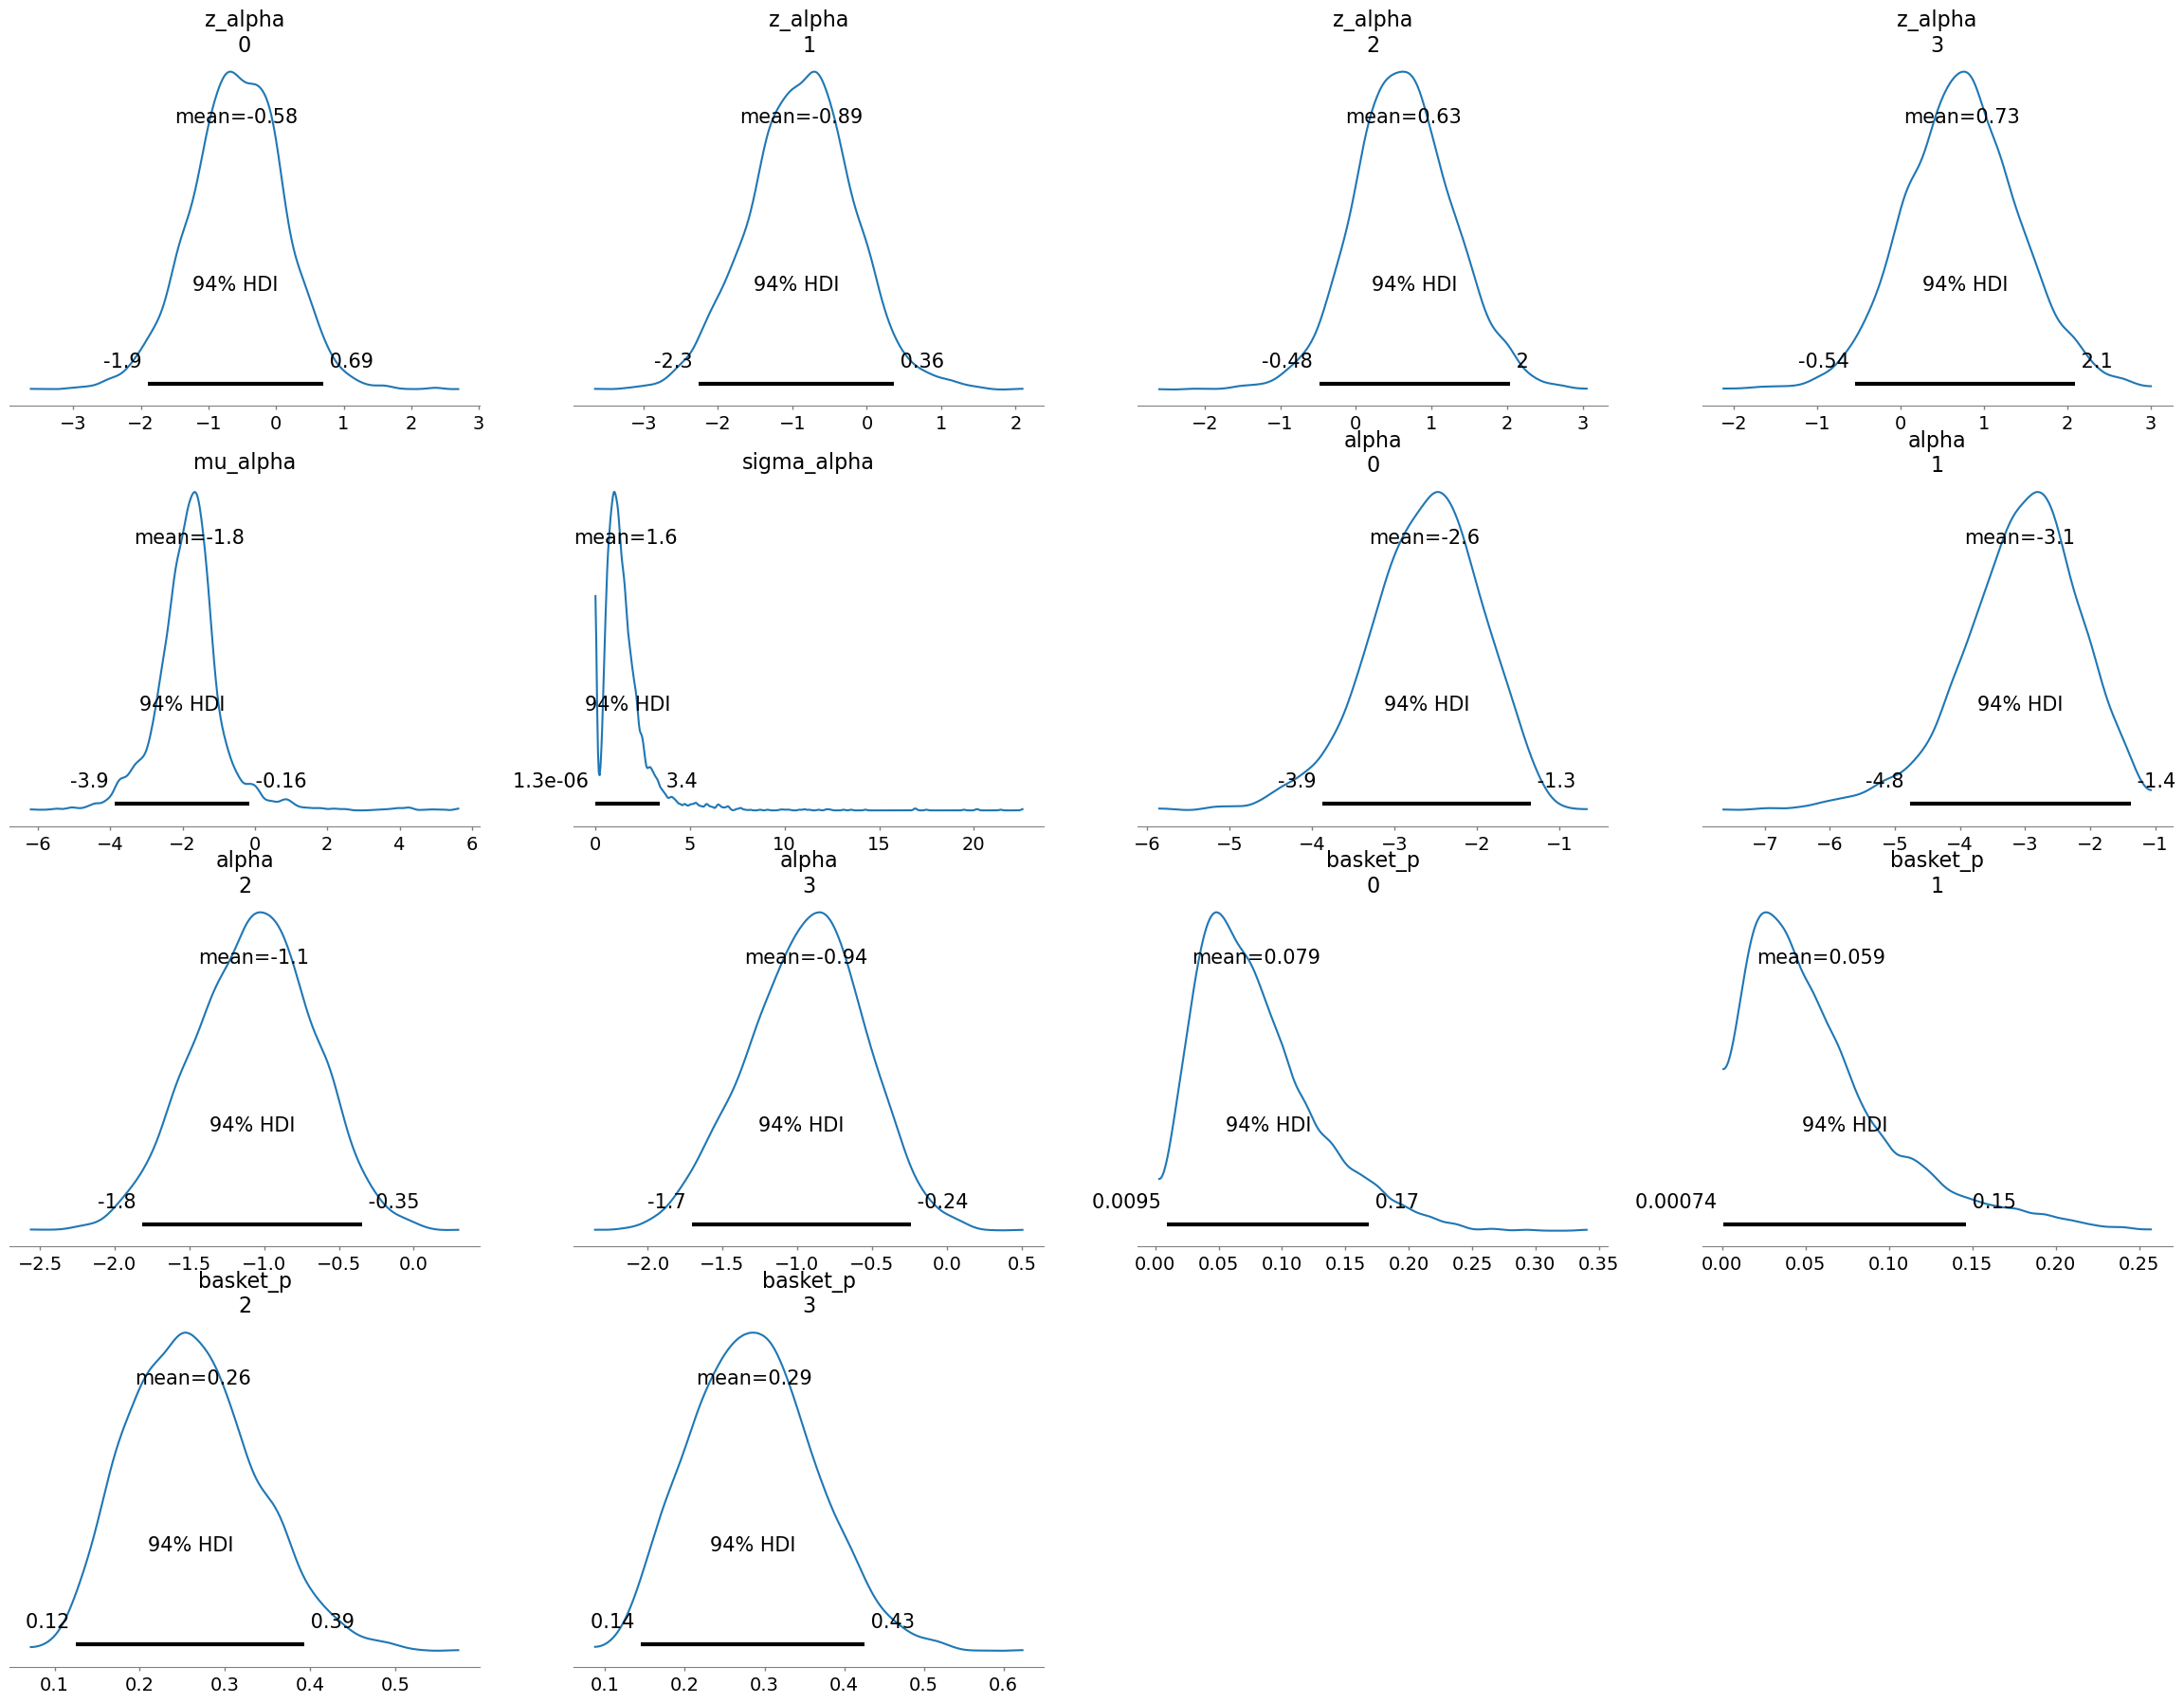

In [38]:
trial.plot_posterior(analysis_name, -1)

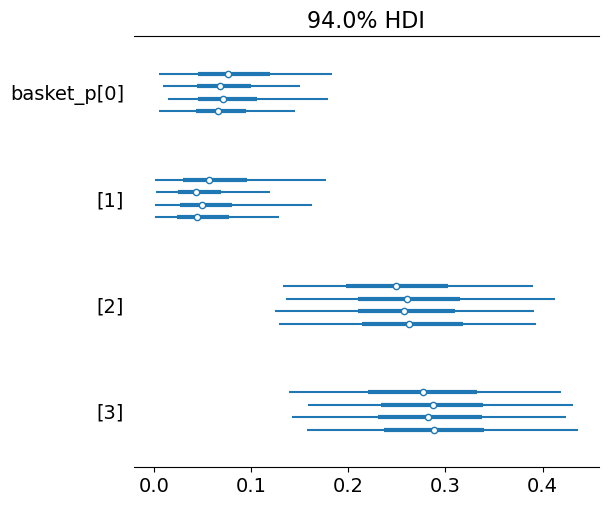

In [39]:
trial.plot_forest(analysis_name, -1)

In [40]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status
k,,,,
0,0.09400,0.05,True,OPEN
1,0.09450,0.05,True,OPEN
2,0.41875,0.05,True,OPEN
3,0.40525,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.02275,0.05,False,OPEN
1,0.01975,0.05,False,OPEN
2,0.80700,0.05,True,OPEN
3,0.80100,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.00450,0.05,False,OPEN
1,0.00475,0.05,False,OPEN
2,0.78450,0.05,True,OPEN
3,0.78850,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.01400,0.05,False,OPEN
1,0.00825,0.05,False,OPEN
2,0.55375,0.05,True,OPEN
3,0.80950,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.01425,0.05,False,OPEN
1,0.00600,0.05,False,OPEN
2,0.72375,0.05,True,OPEN
3,0.90250,0.05,True,OPEN


,prob,Q,effective,group_status
k,,,,
0,0.27325,0.9,False,COMPLETED_INEFFECTIVE
1,0.16100,0.9,False,COMPLETED_INEFFECTIVE
2,0.99750,0.9,True,COMPLETED_EFFECTIVE
3,0.99975,0.9,True,COMPLETED_EFFECTIVE


In [41]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,35
1,COMPLETED_INEFFECTIVE,1,35
2,COMPLETED_EFFECTIVE,10,35
3,COMPLETED_EFFECTIVE,11,35
